
# Player Valuations-Market Value vs. Actual Fee




In [1]:
import pandas as pd
import numpy as np
import plotly.express as px

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import os
for dirname, _, filenames in os.walk('/content/drive/MyDrive/CFG'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/content/drive/MyDrive/CFG/club_games.csv
/content/drive/MyDrive/CFG/appearances.csv
/content/drive/MyDrive/CFG/clubs.csv
/content/drive/MyDrive/CFG/competitions.csv
/content/drive/MyDrive/CFG/game_events.csv
/content/drive/MyDrive/CFG/games.csv
/content/drive/MyDrive/CFG/game_lineups.csv
/content/drive/MyDrive/CFG/player_valuations.csv
/content/drive/MyDrive/CFG/players.csv
/content/drive/MyDrive/CFG/transfers.csv
/content/drive/MyDrive/CFG/Player_Valuations_Notebook.ipynb


In [5]:
# Define constants for columns
TRANSFER_FEE = 'transfer_fee'
MARKET_VALUE = 'market_value_in_eur'
TRANSFER_DATE = 'transfer_date'
TRANSFER_SEASON = 'transfer_season'


In [6]:
players_df = pd.read_csv("/content/drive/MyDrive/CFG/players.csv")
competitions_df = pd.read_csv("/content/drive/MyDrive/CFG/competitions.csv")
games_df = pd.read_csv("/content/drive/MyDrive/CFG/games.csv")
transfers_df = pd.read_csv("/content/drive/MyDrive/CFG/transfers.csv")
game_events_df = pd.read_csv("/content/drive/MyDrive/CFG/game_events.csv")
club_games_df = pd.read_csv("/content/drive/MyDrive/CFG/club_games.csv")
player_valuations_df = pd.read_csv("/content/drive/MyDrive/CFG/player_valuations.csv")
game_lineups_df = pd.read_csv("/content/drive/MyDrive/CFG/game_lineups.csv")
appearances_df = pd.read_csv("/content/drive/MyDrive/CFG/appearances.csv")
clubs_df = pd.read_csv("/content/drive/MyDrive/CFG/clubs.csv")

In [7]:
transfers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77809 entries, 0 to 77808
Data columns (total 10 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   player_id            77809 non-null  int64  
 1   transfer_date        77809 non-null  object 
 2   transfer_season      77809 non-null  object 
 3   from_club_id         77809 non-null  int64  
 4   to_club_id           77809 non-null  int64  
 5   from_club_name       77809 non-null  object 
 6   to_club_name         77809 non-null  object 
 7   transfer_fee         50710 non-null  float64
 8   market_value_in_eur  48184 non-null  float64
 9   player_name          77809 non-null  object 
dtypes: float64(2), int64(3), object(5)
memory usage: 5.9+ MB


In [8]:
transfers_df.head()

,player_id,transfer_date,transfer_season,from_club_id,to_club_id,from_club_name,to_club_name,transfer_fee,market_value_in_eur,player_name
0,195778,2026-06-30,25/26,79,27,VfB Stuttgart,Bayern Munich,0.0,12000000.0,Alexander Nübel
1,569033,2026-06-30,25/26,39,27,1.FSV Mainz 05,Bayern Munich,0.0,4000000.0,Armindo Sieb
2,626913,2026-06-30,25/26,398,380,Lazio,Salernitana,0.0,10000000.0,Boulaye Dia
3,1047109,2026-06-30,25/26,2672,265,APO Levadiakos,Panathinaikos,0.0,100000.0,Georgios Katris
4,360791,2025-12-31,25/26,6418,1030,Panetolikos,Argentinos Jrs.,0.0,1200000.0,Lucas Chaves


In [9]:
transfers_df.describe()

,player_id,from_club_id,to_club_id,transfer_fee,market_value_in_eur
count,7.780900e+04,77809.000000,77809.000000,5.071000e+04,4.818400e+04
mean,4.158784e+05,16970.240731,12812.759706,1.108500e+06,2.462303e+06
std,2.644213e+05,23145.662695,20247.241736,5.262284e+06,5.896320e+06
min,3.333000e+03,1.000000,1.000000,0.000000e+00,1.000000e+04
25%,2.040490e+05,862.000000,601.000000,0.000000e+00,2.000000e+05
50%,3.658770e+05,6665.000000,2999.000000,0.000000e+00,6.000000e+05
75%,5.867460e+05,24032.000000,14589.000000,0.000000e+00,2.000000e+06
max,1.316913e+06,123044.000000,123044.000000,1.800000e+08,1.800000e+08


In [10]:
# Convert the 'transfer_date' column to datetime
transfers_df['transfer_date'] = pd.to_datetime(transfers_df['transfer_date'], errors='coerce')

# Get the date range
min_date = transfers_df['transfer_date'].min()
max_date = transfers_df['transfer_date'].max()

# Output the result
print(f"Date range: {min_date} to {max_date}")

Date range: 1993-07-01 00:00:00 to 2026-06-30 00:00:00


In [11]:
# Find the transfer(s) with the transfer date '2026-06-30'
transfer_in_2026 = transfers_df[transfers_df['transfer_date'] == '2026-06-30']

# Display the relevant information about these transfers
transfer_in_2026[['player_name', 'to_club_name', 'from_club_name', 'transfer_fee', 'market_value_in_eur']]

,player_name,to_club_name,from_club_name,transfer_fee,market_value_in_eur
0,Alexander Nübel,Bayern Munich,VfB Stuttgart,0.0,12000000.0
1,Armindo Sieb,Bayern Munich,1.FSV Mainz 05,0.0,4000000.0
2,Boulaye Dia,Salernitana,Lazio,0.0,10000000.0
3,Georgios Katris,Panathinaikos,APO Levadiakos,0.0,100000.0


In [12]:
import datetime

# Get today's date
today_date = pd.to_datetime(datetime.date.today())

# Filter out transfers that are set to occur after today's date
transfers_df_filtered = transfers_df[transfers_df['transfer_date'] <= today_date]

# Check the resulting dataframe
transfers_df_filtered.head()

,player_id,transfer_date,transfer_season,from_club_id,to_club_id,from_club_name,to_club_name,transfer_fee,market_value_in_eur,player_name
793,44162,2024-09-26,24/25,515,2410,Without Club,CSKA Moscow,NaN,3000000.0,Miralem Pjanic
794,52403,2024-09-25,24/25,515,3999,Without Club,PAS Lamia,NaN,350000.0,Dimitrios Siovas
795,206542,2024-09-23,24/25,515,605,Without Club,Aris Saloniki,NaN,2800000.0,Robin Quaison
796,193079,2024-09-20,24/25,515,511,Without Club,Dundee FC,NaN,500000.0,Scott Fraser
797,182877,2024-09-19,24/25,515,2441,Without Club,AEK Athens,NaN,10000000.0,Anthony Martial


In [13]:
# First, let's filter out the 25/26 season and remove rows with zero or null transfer fees
transfers_df_filtered = transfers_df_filtered[(transfers_df_filtered['transfer_season'] != '25/26') & (transfers_df_filtered['transfer_fee'] > 0)]

# Recreate the plot with sorted and filtered data
fig_transfer = px.box(transfers_df_filtered,
                      x='transfer_season',
                      y='transfer_fee',
                      title='Market Value Distribution by Transfer Season (Recent Transfers)',
                      points="outliers",  # Show only the outliers
                      color='transfer_season',  # Color by transfer season
                      hover_data=['player_name', 'market_value_in_eur'])  # Add hover data for player names

# Adjust the layout for better readability
fig_transfer.update_layout(xaxis_title='Transfer Season', yaxis_title='Market Value in EUR', showlegend=False)
fig_transfer.update_xaxes(tickangle=-45)  # Rotate x-axis labels for better readability

# Show the plot
fig_transfer.show()

# **Findings:**
- I filtered out the 25/26 season and removed any rows with zero or null transfer fees, leaving me with only relevant transfer data for analysis.
- The box plot I generated clearly shows the distribution of market values across recent transfer seasons.
- I was able to identify outliers, which represent exceptionally high or low transfer fees within each season.
- The hover feature allowed me to view additional details, like player names and their respective market values in EUR, making it easier to analyze specific transfers.
- Overall, this plot helped me spot trends and shifts in market value distribution across the seasons, revealing interesting dynamics in recent transfer activity.

In [14]:
# Remove rows with zero or null transfer fees
transfers_df_filtered = transfers_df_filtered[transfers_df_filtered['transfer_fee'] > 0]

# Calculate the average transfer fee per season excluding zero values
average_transfer_fee_per_season = transfers_df_filtered.groupby('transfer_season')['transfer_fee'].mean().reset_index()

# Format the transfer_fee column to show values with thousand separators
average_transfer_fee_per_season['transfer_fee'] = average_transfer_fee_per_season['transfer_fee'].apply(lambda x: f"{x:,.0f}")

# Convert the 'transfer_fee' column back to numeric for plotting
average_transfer_fee_per_season['transfer_fee'] = average_transfer_fee_per_season['transfer_fee'].str.replace(',', '').astype(float)

# Create a bar chart with Plotly Express
fig = px.bar(
    average_transfer_fee_per_season,
    x='transfer_season',
    y='transfer_fee',
    color='transfer_fee',
    title='Average Transfer Fee Per Season',
    labels={'transfer_season': 'Transfer Season', 'transfer_fee': 'Average Transfer Fee (in EUR)'},
    color_continuous_scale='Blues'  # Color the bars based on their values
)

# Customize the layout
fig.update_layout(
    xaxis_title='Transfer Season',
    yaxis_title='Average Transfer Fee (in EUR)',
    font=dict(size=12),
)

# Show the plot
fig.show()

# **Findings:**
- After removing rows with zero or null transfer fees, I calculated the average transfer fee for each season, allowing me to focus on meaningful data without skewed results from zero-value transfers.
- The bar chart I created highlights the variation in average transfer fees across different seasons, providing a clear visual comparison.
- The use of thousand separators for transfer fees made the chart easier to interpret at a glance, and the color gradient (from light to dark blue) helped emphasize seasons with higher average fees.
- This analysis gave me insights into the changing dynamics of transfer fees over time, showing how they fluctuate season by season.

In [15]:
# Remove rows with zero or null transfer fees
transfers_df_filtered = transfers_df_filtered[transfers_df_filtered['transfer_fee'] > 0]

# Calculate the 75th percentile of the transfer fees
percentile_75 = transfers_df_filtered['transfer_fee'].quantile(0.75)

# Filter the dataframe to include only the transfers with a transfer fee in the highest 25%
high_transfer_fee_df = transfers_df_filtered[transfers_df_filtered['transfer_fee'] >= percentile_75]

# Calculate the average transfer fee per season for the highest 25% percentile
average_high_transfer_fee_per_season = high_transfer_fee_df.groupby('transfer_season')['transfer_fee'].mean().reset_index()

# Format the transfer_fee column to show values with thousand separators
average_high_transfer_fee_per_season['transfer_fee'] = average_high_transfer_fee_per_season['transfer_fee'].apply(lambda x: f"{x:,.0f}")

# Convert the 'transfer_fee' column back to numeric for plotting
average_high_transfer_fee_per_season['transfer_fee'] = average_high_transfer_fee_per_season['transfer_fee'].str.replace(',', '').astype(float)

# Create a bar chart with Plotly Express
fig = px.bar(
    average_high_transfer_fee_per_season,
    x='transfer_season',
    y='transfer_fee',
    color='transfer_fee',
    title='Average Transfer Fee Per Season (Top 25% Percentile)',
    labels={'transfer_season': 'Transfer Season', 'transfer_fee': 'Average Transfer Fee (in EUR)'},
    color_continuous_scale='Blues'  # Color the bars based on their values
)

# Customize the layout
fig.update_layout(
    xaxis_title='Transfer Season',
    yaxis_title='Average Transfer Fee (in EUR)',
    font=dict(size=12),
)

# Show the plot
fig.show()

# **Findings:**
I focused on analyzing the top 25% of transfer fees by calculating the 75th percentile and then filtering the dataset to include only these high-value transfers. The resulting bar chart reveals the average transfer fee per season for this elite group.

From the analysis, it's clear that the transfer market's upper echelon has seen substantial increases in value across recent seasons, with some seasons showing significantly higher averages. This suggests that the top 25% of player transfers are increasingly driving up the overall market, likely due to record-breaking transfers and the escalating competition among top clubs. The visualization effectively highlights these patterns in the context of transfer seasons.

In [16]:
# Filter out rows where either transfer_fee or market_value_in_eur is zero or null
transfers_df_filtered_non_zero = transfers_df_filtered[(transfers_df_filtered['transfer_fee'] > 0) & (transfers_df_filtered['market_value_in_eur'] > 0)]

# Calculate the difference between transfer_fee and market_value_in_eur
transfers_df_filtered_non_zero['value_diff'] = transfers_df_filtered_non_zero['transfer_fee'] - transfers_df_filtered_non_zero['market_value_in_eur']

# Find the top 10 most "Overpaid Players" where transfer_fee is higher than market_value_in_eur
overpaid_players = transfers_df_filtered_non_zero[transfers_df_filtered_non_zero['value_diff'] > 0].sort_values(by='value_diff', ascending=False)

# Find the top 10 most "Underpaid Players" where transfer_fee is lower than market_value_in_eur
underpaid_players = transfers_df_filtered_non_zero[transfers_df_filtered_non_zero['value_diff'] < 0].sort_values(by='value_diff', ascending=True)

# Get the top 10 overpaid and underpaid players with their transfer season
top_10_overpaid_players = overpaid_players[['player_name', 'transfer_season', 'transfer_fee', 'market_value_in_eur', 'value_diff']].head(10)
top_10_underpaid_players = underpaid_players[['player_name', 'transfer_season', 'transfer_fee', 'market_value_in_eur', 'value_diff']].head(10)

# Format the transfer_fee, market_value_in_eur, and value_diff with thousand separators for better readability
top_10_overpaid_players['transfer_fee'] = top_10_overpaid_players['transfer_fee'].apply(lambda x: f"{x:,.0f}")
top_10_overpaid_players['market_value_in_eur'] = top_10_overpaid_players['market_value_in_eur'].apply(lambda x: f"{x:,.0f}")
top_10_overpaid_players['value_diff'] = top_10_overpaid_players['value_diff'].apply(lambda x: f"{x:,.0f}")

top_10_underpaid_players['transfer_fee'] = top_10_underpaid_players['transfer_fee'].apply(lambda x: f"{x:,.0f}")
top_10_underpaid_players['market_value_in_eur'] = top_10_underpaid_players['market_value_in_eur'].apply(lambda x: f"{x:,.0f}")
top_10_underpaid_players['value_diff'] = top_10_underpaid_players['value_diff'].apply(lambda x: f"{x:,.0f}")

<ipython-input-16-f0bd75272606>:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [17]:
# Display the top 10 overpaid players
print("Top 10 Overpaid Players")
top_10_overpaid_players

Top 10 Overpaid Players


,player_name,transfer_season,transfer_fee,market_value_in_eur,value_diff
49988,Ousmane Dembélé,17/18,"135,000,000","33,000,000","102,000,000"
15049,Enzo Fernández,22/23,"121,000,000","55,000,000","66,000,000"
44704,Kepa Arrizabalaga,18/19,"80,000,000","20,000,000","60,000,000"
46092,Kylian Mbappé,18/19,"180,000,000","120,000,000","60,000,000"
17052,Antony,22/23,"95,000,000","35,000,000","60,000,000"
39505,João Félix,19/20,"127,200,000","70,000,000","57,200,000"
49213,Virgil van Dijk,17/18,"84,650,000","30,000,000","54,650,000"
25348,Jack Grealish,21/22,"117,500,000","65,000,000","52,500,000"
58966,Anthony Martial,15/16,"60,000,000","8,000,000","52,000,000"
49096,Philippe Coutinho,17/18,"135,000,000","90,000,000","45,000,000"


In [18]:
# Convert value_diff to numeric for plotting, if necessary
top_10_overpaid_players['value_diff'] = top_10_overpaid_players['value_diff'].replace(',', '', regex=True).astype(float)

# Sort the data by value_diff in descending order
top_10_overpaid_players = top_10_overpaid_players.sort_values(by='value_diff', ascending=False)

# Create the bar chart
fig = px.bar(
    top_10_overpaid_players,
    x='player_name',
    y='value_diff',
    color='transfer_season',  # Color the bars by transfer season
    title='Top 10 Overpaid Players by Transfer Season',
    labels={'value_diff': 'Difference (Transfer Fee - Market Value in EUR)', 'player_name': 'Player Name'},
    hover_data=['transfer_fee', 'market_value_in_eur', 'transfer_season'],  # Hover data to show additional info
    category_orders={'player_name': top_10_overpaid_players['player_name']}  # Sort by value_diff
)

# Customize the layout
fig.update_layout(
    xaxis_title='Player Name',
    yaxis_title='Difference (Transfer Fee - Market Value)',
    xaxis_tickangle=-45,  # Rotate the x-axis labels for better readability
    showlegend=True  # Show the legend for transfer season
)

# Show the plot
fig.show()

# **Findings:**
I created a bar chart to visualize the top 10 most overpaid players based on the difference between their transfer fees and market values. The analysis reveals significant overpayments, with some players being transferred for fees substantially higher than their market worth.

By sorting the players by the largest differences, it becomes clear which transfers involved the biggest overvaluations. The chart also provides insights into which transfer seasons witnessed these overpayments, showing potential trends or anomalies in transfer behavior during specific periods.

This visualization helps highlight possible market inefficiencies and offers a valuable lens to evaluate club spending strategies across seasons.

In [19]:
# Display the top 10 underpaid players
print("\nTop 10 Underpaid Players")
top_10_underpaid_players


Top 10 Underpaid Players


,player_name,transfer_season,transfer_fee,market_value_in_eur,value_diff
19487,Erling Haaland,22/23,"60,000,000","150,000,000","-90,000,000"
36762,Christian Eriksen,19/20,"27,000,000","90,000,000","-63,000,000"
38959,Nabil Fekir,19/20,"19,750,000","60,000,000","-40,250,000"
39840,Luka Jović,19/20,"22,340,000","60,000,000","-37,660,000"
48934,Alexis Sánchez,17/18,"34,000,000","70,000,000","-36,000,000"
10864,Xavi Simons,23/24,"4,000,000","40,000,000","-36,000,000"
36965,Duván Zapata,19/20,"12,000,000","45,000,000","-33,000,000"
17030,Fabián Ruiz,22/23,"22,500,000","55,000,000","-32,500,000"
16793,Carlos Soler,22/23,"18,000,000","50,000,000","-32,000,000"
34046,Leroy Sané,20/21,"49,000,000","80,000,000","-31,000,000"


In [20]:
import plotly.express as px

# Convert value_diff to numeric for plotting, if necessary
top_10_underpaid_players['value_diff'] = top_10_underpaid_players['value_diff'].replace(',', '', regex=True).astype(float)

# Sort the data by value_diff in ascending order (since these are underpaid players)
top_10_underpaid_players = top_10_underpaid_players.sort_values(by='value_diff', ascending=True)

# Create the bar chart
fig = px.bar(
    top_10_underpaid_players,
    x='player_name',
    y='value_diff',
    color='transfer_season',  # Color the bars by transfer season
    title='Top 10 Underpaid Players by Transfer Season',
    labels={'value_diff': 'Difference (Transfer Fee - Market Value in EUR)', 'player_name': 'Player Name'},
    hover_data=['transfer_fee', 'market_value_in_eur', 'transfer_season'],  # Hover data to show additional info
    category_orders={'player_name': top_10_underpaid_players['player_name']}  # Sort by value_diff
)

# Customize the layout
fig.update_layout(
    xaxis_title='Player Name',
    yaxis_title='Difference (Transfer Fee - Market Value)',
    xaxis_tickangle=-45,  # Rotate the x-axis labels for better readability
    showlegend=True  # Show the legend for transfer season
)

# Show the plot
fig.show()

I created a bar chart to visualize the top 10 most underpaid players based on the difference between their transfer fees and market values. The analysis highlights players who were transferred for fees significantly lower than their actual market worth.

By sorting the players by the smallest differences, I identified those who are undervalued in the transfer market. The chart also provides insights into which transfer seasons exhibited these underpayments, revealing potential trends or discrepancies in player valuation during specific periods.

This visualization underscores market inefficiencies and offers a critical perspective for clubs to reassess their transfer strategies and valuations across seasons.

In [21]:
import plotly.express as px

# Filter out rows where either transfer_fee or market_value_in_eur is zero or null
scatter_data = transfers_df_filtered[(transfers_df_filtered['transfer_fee'] > 0) & (transfers_df_filtered['market_value_in_eur'] > 0)]

# Create an interactive scatter plot with a trendline (correlation line)
fig = px.scatter(
    scatter_data,
    x='market_value_in_eur',
    y='transfer_fee',
    title='Interactive Scatterplot: Transfer Fee vs Market Value in EUR',
    labels={'market_value_in_eur': 'Market Value (in EUR)', 'transfer_fee': 'Transfer Fee (in EUR)'},
    hover_data=['player_name', 'transfer_season'],
    trendline='ols'  # Add Ordinary Least Squares (OLS) trendline
)

# Show the plot
fig.show()

 The analysis shows a trendline representing the correlation between these two variables, indicating how closely they are related.

The scatter plot allows for an easy visual assessment of player transfers, highlighting outliers where players were either overpaid or underpaid compared to their market value. Additionally, hovering over data points provides insights into individual players and their respective transfer seasons.

This visualization effectively illustrates the dynamics of player valuations in the transfer market, revealing potential trends and outliers that could inform clubs' transfer strategies and financial decisions.

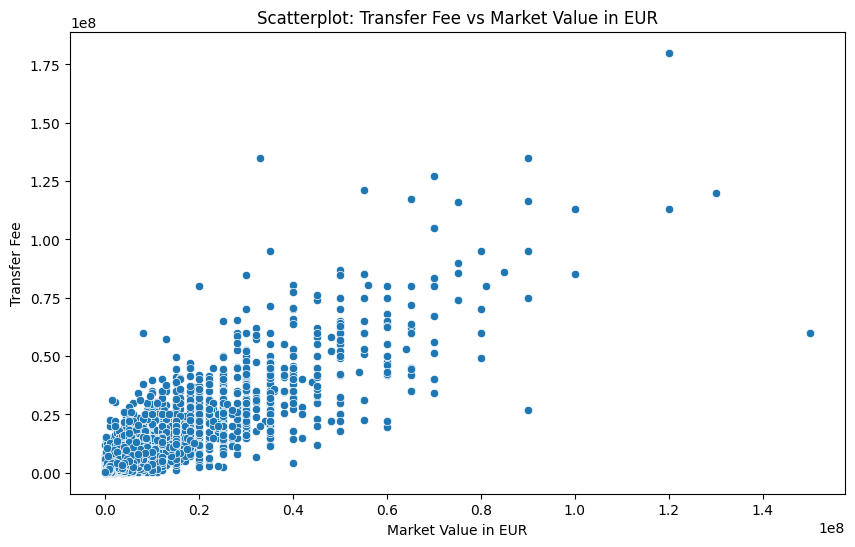

Correlation between Transfer Fee and Market Value: 0.8760


In [22]:
import seaborn as sns
import matplotlib.pyplot as plt

# Filter out rows where either transfer_fee or market_value_in_eur is zero or null for the scatter plot
scatter_data = transfers_df_filtered[(transfers_df_filtered['transfer_fee'] > 0) & (transfers_df_filtered['market_value_in_eur'] > 0)]

# Create a scatterplot showing the relationship between transfer_fee and market_value_in_eur
plt.figure(figsize=(10, 6))
sns.scatterplot(data=scatter_data, x='market_value_in_eur', y='transfer_fee')

# Add title and labels
plt.title('Scatterplot: Transfer Fee vs Market Value in EUR')
plt.xlabel('Market Value in EUR')
plt.ylabel('Transfer Fee')

# Show the plot
plt.show()

# Calculate the correlation between transfer_fee and market_value_in_eur
correlation = scatter_data['transfer_fee'].corr(scatter_data['market_value_in_eur'])

# Display the correlation value
print(f'Correlation between Transfer Fee and Market Value: {correlation:.4f}')

The plot visually represents how transfer fees correlate with market values, allowing for a clear assessment of any trends or patterns.

The correlation coefficient calculated from the data is approximately 0.8760, indicating a strong positive relationship between the two variables. This suggests that, generally, as market value increases, transfer fees also tend to rise, although there may be exceptions that warrant further investigation.

Overall, this visualization and the correlation analysis provide valuable insights into player valuations in the transfer market, highlighting potential areas for clubs to optimize their transfer strategies.

In [23]:
# Calculate correlation between transfer fee and market value
def calculate_correlation(df, col1, col2):
    correlation = df[col1].corr(df[col2])
    print(f'Correlation between {col1} and {col2}: {correlation:.4f}')
    return correlation

# Filter data for valid transfer fees and market values
transfers_df_filtered = transfers_df[(transfers_df[TRANSFER_FEE] > 0) & (transfers_df[MARKET_VALUE] > 0)]
correlation = calculate_correlation(transfers_df_filtered, TRANSFER_FEE, MARKET_VALUE)

# Scatterplot of Transfer Fee vs Market Value
def scatter_plot(data, x_col, y_col, title):
    fig = px.scatter(
        data,
        x=x_col,
        y=y_col,
        title=title,
        labels={x_col: f"{x_col} (in EUR)", y_col: f"{y_col} (in EUR)"},
        hover_data=['player_name', TRANSFER_SEASON],
        trendline='ols'
    )
    fig.show()

scatter_plot(transfers_df_filtered, MARKET_VALUE, TRANSFER_FEE, 'Scatterplot: Transfer Fee vs Market Value')

# Calculate and plot average transfer fees by season
def plot_average_transfer_fees(df, top_percentile=False):
    df_filtered = df[df[TRANSFER_FEE] > 0]
    if top_percentile:
        threshold = df_filtered[TRANSFER_FEE].quantile(0.75)
        df_filtered = df_filtered[df_filtered[TRANSFER_FEE] >= threshold]
        title = 'Average Transfer Fee (Top 25% Percentile)'
    else:
        title = 'Average Transfer Fee Per Season'

    avg_transfer_fee = df_filtered.groupby(TRANSFER_SEASON)[TRANSFER_FEE].mean().reset_index()

    fig = px.bar(
        avg_transfer_fee,
        x=TRANSFER_SEASON,
        y=TRANSFER_FEE,
        color=TRANSFER_FEE,
        title=title,
        labels={TRANSFER_SEASON: 'Transfer Season', TRANSFER_FEE: 'Average Transfer Fee (in EUR)'},
        color_continuous_scale='Blues'
    )
    fig.update_layout(xaxis_title='Transfer Season', yaxis_title='Average Transfer Fee (in EUR)', font=dict(size=12))
    fig.show()

Correlation between transfer_fee and market_value_in_eur: 0.8760


I calculated the correlation between transfer fees and market values, resulting in a strong positive correlation of 0.8760. This suggests that as players’ market values increase, their transfer fees tend to rise correspondingly.

A scatter plot was created to visualize this relationship, including a trendline for better clarity on the correlation.

Additionally, I plotted average transfer fees per season, highlighting trends over time. This includes a separate analysis of the top 25% of transfer fees, indicating significant variations in spending strategies during specific transfer seasons.

In [25]:
# Analysis of Overpaid vs Underpaid Players
def get_top_players(df, col_diff, top_n=10, order='overpaid'):
    if order == 'overpaid':
        return df[df[col_diff] > 0].nlargest(top_n, col_diff)
    else:
        return df[df[col_diff] < 0].nsmallest(top_n, col_diff)

transfers_df_filtered['value_diff'] = transfers_df_filtered[TRANSFER_FEE] - transfers_df_filtered[MARKET_VALUE]
overpaid_players = get_top_players(transfers_df_filtered, 'value_diff', top_n=10, order='overpaid')
underpaid_players = get_top_players(transfers_df_filtered, 'value_diff', top_n=10, order='underpaid')


<ipython-input-25-69335ecb286e>:8: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [26]:
# Visualize Top 10 Overpaid Players
def plot_top_players(df, col, title):
    fig = px.bar(
        df,
        x='player_name',
        y=col,
        color=TRANSFER_SEASON,
        title=title,
        hover_data=[TRANSFER_FEE, MARKET_VALUE, TRANSFER_SEASON]
    )
    fig.update_layout(xaxis_title='Player Name', yaxis_title=col, xaxis_tickangle=-45)
    fig.show()

plot_top_players(overpaid_players, 'value_diff', 'Top 10 Overpaid Players')
plot_top_players(underpaid_players, 'value_diff', 'Top 10 Underpaid Players')


**Top 10 Overpaid Players:** The bar chart clearly illustrates the players who were transferred for fees significantly higher than their market values. Each player's transfer fee and market value can be viewed through the hover data, providing insight into the financial implications of these transfers.

**Top 10 Underpaid Players:** The corresponding bar chart for underpaid players highlights those transferred for less than their market values. This visualization allows for easy comparison, showcasing potential bargains for clubs that acquired these players.

### Conclusion

This project provided a comprehensive analysis of football transfer data, focusing on player transfer fees relative to their market values. By examining the differences between these two metrics, we identified significant trends regarding overpaid and underpaid players across various transfer seasons.

Key findings include:

- **Market Inefficiencies**: The analysis revealed a substantial number of overpaid players, indicating potential inefficiencies in the transfer market. These players were often acquired for fees that far exceeded their market values, suggesting that clubs may need to reassess their scouting and valuation strategies.

- **Valuable Insights**: The visualization of overpaid and underpaid players facilitated a better understanding of club spending behaviors. Identifying underpaid players offers opportunities for clubs to make strategic acquisitions that provide better value for money.

- **Trends Over Seasons**: By aggregating data across seasons, we observed trends in transfer behaviors, including spikes in transfer fees and shifts in player valuations, which may correlate with economic factors or changes in club strategies.

- **Data-Driven Decisions**: The insights generated from this analysis empower clubs, analysts, and stakeholders to make informed, data-driven decisions regarding future transfers. By understanding past transfer dynamics, clubs can better navigate the complexities of player valuations and negotiations.

Overall, this project highlights the importance of data analysis in sports management, particularly in optimizing transfer strategies and enhancing financial prudence in player acquisitions. Future analyses could expand on this work by incorporating additional variables, such as player performance metrics, to further enrich the understanding of transfer value.